<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/main/kuba_img_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!apt-get install poppler-utils 
!apt-get install tesseract-ocr-pol
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-dev
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (300 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-en

In [4]:
pip install pytesseract 

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=1234b1da440067ac20cf222b6b91a8dacd94ad5d8e1c5c82c9182a61ff1c8f22
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [5]:
pip install autocorrect

     |████████████████████████████████| 622 kB 33.0 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.5.0-py3-none-any.whl size=621851 sha256=c4075402f701e66fdb7923c8f075ede2643fab8d5e97a74c8b1f021caa9af89f
  Stored in directory: /root/.cache/pip/wheels/3d/8e/bd/f6fd900a056a031bf710a00bca338d86f43b83f0c25ab5242f
Successfully built autocorrect


In [8]:
from PIL import Image 
import pytesseract 
import sys 
import os
import pandas as pd
import cv2 
import os
from PIL import Image
from pytesseract import image_to_string
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from autocorrect import Speller
from matplotlib.pyplot import figure


In [9]:
def fig_prepare(file):
  rgb_image = cv2.imread(file)
  gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
  kernelSizes = (11, 11)
  gray_image_blurred = cv2.blur(gray_image,kernelSizes)
  gray_image_copy=gray_image.copy()
  gray_image_copy[(gray_image_blurred<150)&(gray_image_blurred>130)]=200
  
  return gray_image_copy

In [10]:
def text_from_image(image):
  image_correct=fig_prepare(image)
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [11]:
#myText,myDigits=text_from_image('drive/MyDrive/kuba/fig253.jpg')

In [192]:
#usuwanie szarego poprzecznego napisu

rgb_image = cv2.imread('drive/MyDrive/kuba/fig94.jpg')

gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

unique, counts = np.unique(gray_image, return_counts=True)
hist_max=np.argmax(counts[120:180])+120
hist_max_all=np.argmax(counts)

kernelSizes = (11, 11)
gray_image_blurred = cv2.blur(gray_image,kernelSizes)
gray_image_copy=gray_image.copy()
gray_image_copy[(gray_image<hist_max+15)&(gray_image>hist_max-15)]=hist_max_all+10
  

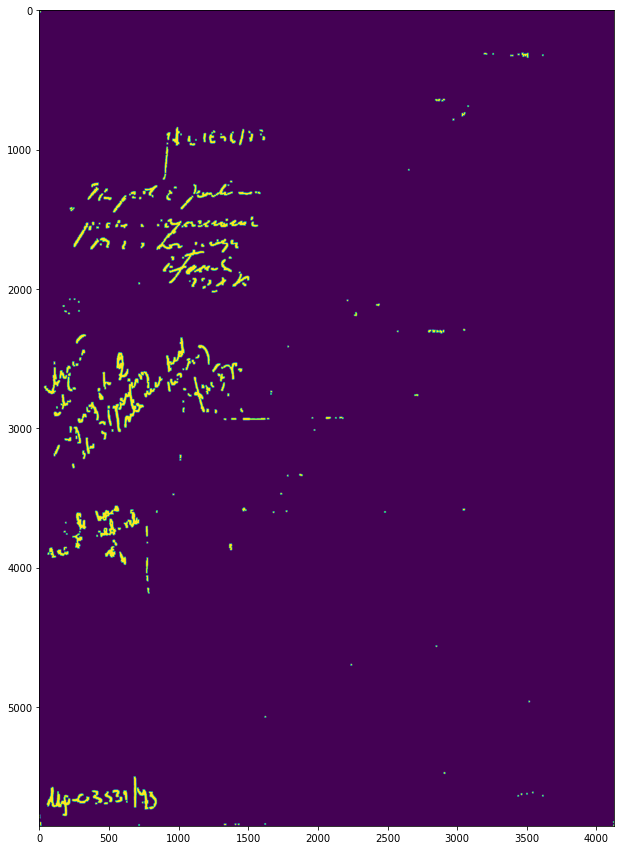

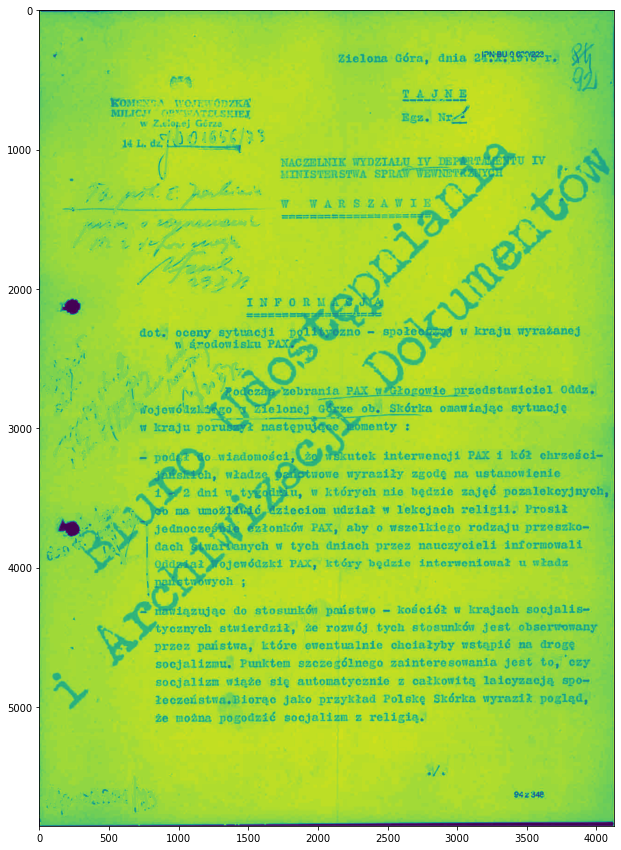

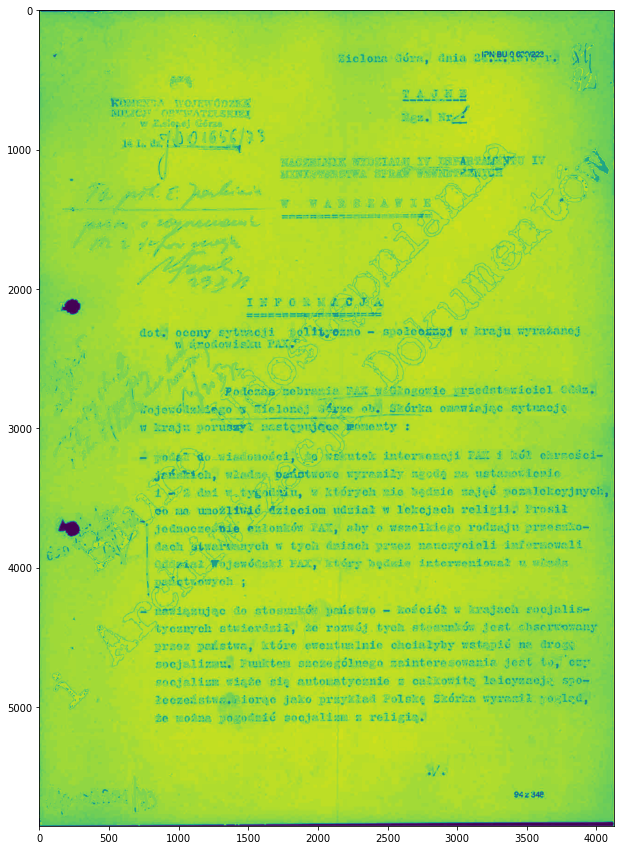

In [200]:
#usuwanie czerwonego napisu

lower_blue = np.array([110,100,90]) #([100,100,90])
upper_blue = np.array([140,250,130]) #([140,250,130]) 
rgb_image_copy=rgb_image.copy()
mask = cv2.inRange(rgb_image, lower_blue , upper_blue ) 
#pogrubienie linii  https://stackoverflow.com/questions/46895772/thicken-a-one-pixel-line
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilate = cv2.dilate(mask, kernel, iterations=5)

rgb_image_copy[dilate>0] = [200,200,200]

gray_image = cv2.cvtColor(rgb_image_copy, cv2.COLOR_BGR2GRAY)

unique, counts = np.unique(gray_image, return_counts=True)
hist_max=np.argmax(counts[120:180])+120
hist_max_all=np.argmax(counts)

gray_image_copy=gray_image.copy()
gray_image_copy[(gray_image<hist_max+10)&(gray_image>hist_max-10)]=hist_max_all
#res = cv2.bitwise_and(rgb_image, rgb_image, mask=255-mask) 

plt.figure(figsize=(15,15))
plt.imshow(dilate)
plt.figure(figsize=(15,15))
plt.imshow(gray_image)

plt.figure(figsize=(15,15))
plt.imshow(gray_image_copy)

In [201]:
custom_config_letters = r'--oem 3 --psm 3'
print(image_to_string(rgb_image, lang='pol',config=custom_config_letters))
print('################################################################')
print(image_to_string(gray_image, lang='pol',config=custom_config_letters))
print('################################################################')
print(image_to_string(gray_image_copy, lang='pol',config=custom_config_letters))

 
     
           
  
  
     
 

Zielona Góra, dnia 2/PNBV 96828

   

KOMENT" WOFEWODZKA 5-00 E
MILICJ" OPY"WATZLSCIEJ |
' w Z.ciojej Górza Egz, Nel

 

 
 
 
 
 

NACZELNIK WYDZIAŁU IY DEI
MINISTERSTWA SPRAW WEWNET

    
 
    
  

 
    
 

i

© INFORUGC

wyc r: 9 zno - Kaya w kraju wyrażanej
„Ś ta © P

1
„B
Bo ARONA MAY” wie rzedstawiciel oddz, >

Zielonej Gógze ob. SO all data cu omawiając sytuację

  

   

Mzieciom udział w lekcjach religii, Prosił 1
jnos ej A Yon PAX, aby o wszelkiego rodzaju przeszko=
aaa A nych w tych dniach przez nauczycieli informowali

olaa PAX, który będzie interweniował u władz 4
rych ; | "M

iązując do stosunków państwo — kościół w krajach socjalis=

God stwierdził, że rozwój tych stosunków jest obserwowany

- Sy przez państwa, które ewentualnie chciałyby wstąpić na drogę "15
socjalizmu. Punktem szczególnego zainteresowania jest to, czy

H| socjalizm wiąże się automatycznie z całkowitą laicyzacją spo=
| s , łeczeństwa.Biorąc jako przykład Polskę Skórk

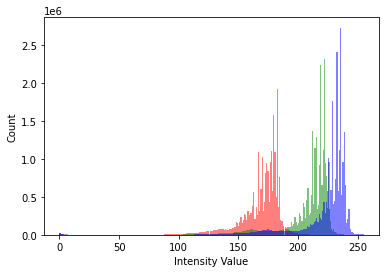

In [107]:

rgb_image = cv2.imread('drive/MyDrive/kuba/fig94.jpg')
#gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
#_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(rgb_image[:, :,0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(rgb_image[:, :,1].ravel(), bins = 256, color = 'green', alpha = 0.5)
_ = plt.hist(rgb_image[:, :,2].ravel(), bins = 256, color = 'blue', alpha = 0.5)

#_ = plt.hist(gray_image_copy[:, :].ravel(), bins = 256, color = 'black', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
#plt.ylim(0,100000)
#plt.xlim(150,250)
plt.show()
#w histogramie trzeba znaleźć dwa maksima- zarówno tła jak i napisu. przepisać zakres napisu do zakresu tła


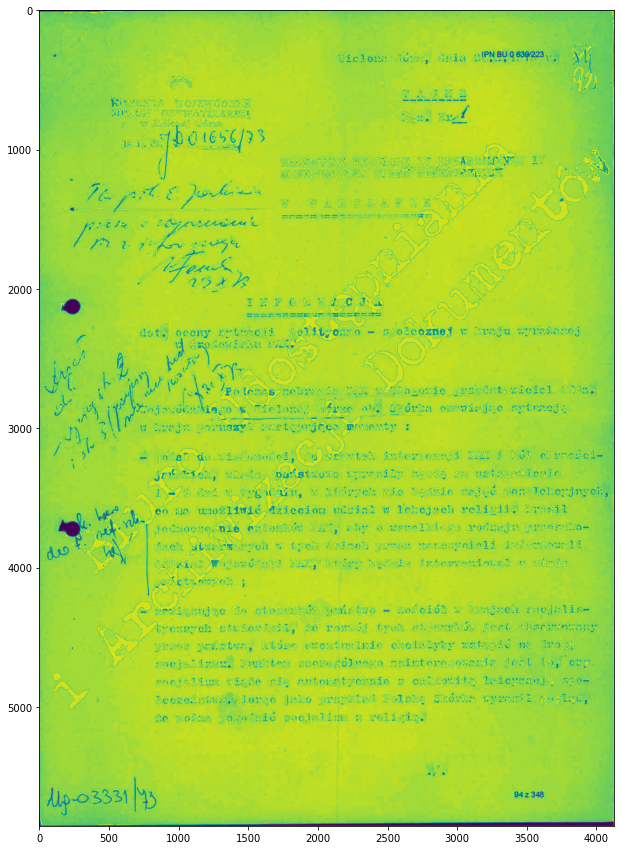

In [14]:
plt.figure(figsize=(15,15))##usunąć niebieskie i czewone podpisy-podpis i pieczątkę
plt.imshow(gray_image_copy)

In [15]:
custom_config_letters = r'--oem 3 --psm 3'
print(image_to_string(gray_image_copy, lang='pol',config=custom_config_letters))

UA
ć jaelake Gora, unia ZANA A

RET] z air

> - | ,
7 4 Ne Ai 14 MZ
A 47- gl 0 4
OE 5 24 u w JOY, ły | mę m m z m$ a w i
HU ć

w ż e. 6% © IŻ
Je 5 " > ę =
08 (l5 4 Ź )

te.
2
_
_
=
—
=
szą

4
i
=
+
£
=
U
»
l
r=l
,
A
ń
4
"
s
a
= l
k 4
h «
I=l
»
ę
za zt
oś.

aCGdŹę © 2€£ PLAA0LA4 |

 

% IWER NAW NA

daw a ESA, dot" ZG = SuGeecznej © Efefu. wysazele
4 e ę
s] LGHE ao SIEG

M. 4h, pet:

y) i !
U z k : : | : A:
(u, NA | Kosa _0 p tę% 2877600006 PRES. GL ZOE. EZEGSTKAWNEJEJ. ©elesze

kz!
c=:

 

. s , w » Mo Aastee RYGI sA zy S0 EF - * =
M0] EOoKZAL GG W, ZŻŻELOWEJ iówze Głs,| SSRÓWEA OdeWieEJĘĆ SNUMACJE

 

 

M (GEJ (osuszy WEJ tępujeiece Rdeóy ż

x © r . 2 - Ą A = AGE 9 3 HZ = |V= 4 Goes r= Ź j
. = WAGAaOGO-CieńomoŚdce, (146 /dsłkkmtelk Aadeznemejs Z A RUS EUSZESCIE
jasiid, uzedzę Daństwoweo opuswicy Zaodć Ga USCEGÓONIEGIE
wy SO) Ue0 > Wisś: 7 Sj ea *Ń i - 10777 w ZEŃ h >, Ales © oz i 0 ra ZZA!
ID=/2 «lai g vykortum, © Etósyen mie kęćzie zajęć (oozaJOECZJNYEN

u Tecejach WELLER WCOSEE

<


In [16]:
#plt.figure(figsize=(15,15))
#plt.imshow(gray_image_copy)

In [17]:
#custom_config_letters = r'--oem 3 --psm 3'
#print(image_to_string(gray_image_copy, lang='pol',config=custom_config_letters))

In [18]:
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
import pandas as pd
import cv2
from PIL import Image,ImageTk
from pytesseract import image_to_string
import numpy as np
import re
import matplotlib.pyplot as plt      
from skimage import io, color, morphology
import pickle
from os import listdir
from os.path import isfile, join
import gc
import sys

In [19]:
class Run():

    def __init__(self):
        #print('start')
        self.countter = 0
        self.countter1 = 0
        self.labels = []
        self.xywh = []
        self.xywh1 = []
        self.path = 'drive/MyDrive/kuba/'
        self.files = [f for f in listdir(self.path) if isfile(join(self.path, f))]
        self.files.sort()
        self.contours = 0

    def setNumber(self,i):
        self.file_nr = i

    def openFile(self):
        #print('opening file')
        self.file = self.path + self.files[self.file_nr]
        #print(self.file)


    def findContour(self,ImageProcessing):
        print('find_contours')
        print('figure preprocessing')
        fig_prepared = ImageProcessing.figPrepare(self.file)
        print('figure prepered')
        print('find contours')
        self.contours, self.xywh = ImageProcessing.find_contours(fig_prepared)
        print('liczba konturów ', len(self.contours))
        return self.contours

    def readText(self, cropped_board):
        #print('analyze figures')
        crop = Image.fromarray(cropped_board)
        try:
            let_crop = image_to_string(cropped_board, lang='pol', config='--psm 7 --oem 3')
        except:
            let_crop = ''
        try:
            div_crop = image_to_string(cropped_board, lang='pol', config='--psm 6 --oem 3')
        except:
            let_crop = ''
        if re.search('[a-zA-Z]', let_crop) or re.search('[a-zA-Z]', div_crop):
            dig_crop = image_to_string(cropped_board, lang='pol', config='--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789')  # r'--oem 3 --psm 3 outputbase digits'
            # let_board=image_to_string(cropped_board, lang='pol',config = '--psm 13 --oem3')
            # plt.imshow(crop)
            # plt.show()
            # input('Press Enter to countinue')
            print(let_crop, div_crop)
            return let_crop, div_crop
        else:
            return '',''

In [20]:
class ImageProcessing:

    def figPrepare(self, file):
        rgb_image = cv2.imread(file)

        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image)
        #plt.show()
        

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image_copy)
        #plt.show()
        ###########################################to musi być###########
        lower_blue=np.array([0])
        upper_blue=np.array([120])
        mask=cv2.inRange(gray_image,lower_blue,upper_blue)

        res=cv2.bitwise_and(gray_image,gray_image,mask=mask)
        res[mask==0]=[255]
        board=int(res.shape[1]*0.01)
        res[:,:board]=255
        res[:,-board:]=255


        return res#gray_image_copy

    def countrurs(self, gray, ythresh):
        thresh = 255 - gray
        # use morphology erode to blur horizontally
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

        # use morphology open to remove thin lines from dotted lines
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
        morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

        # find contours
        # tzreba wywietlić kontury z obrazkiem
        cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #####################################################3
        #print('kontury  len ',len(cntrs))
        cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]
        #print('kontury  len pop',len(cntrs[0]))
        #cntrs=cntrs[0]
        ##########################################

        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()

       


        # find the topmost box

        for c in cntrs:
            box = cv2.boundingRect(c)
            x, y, w, h = box
            if y < ythresh:
                topbox = box
                ythresh = y
        
        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()
        return cntrs[::-1], topbox

    # loading contours
    def image_correction(self,gray_image):

        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        unique, counts = np.unique(gray_image, return_counts=True)
        hist_max=np.argmax(counts[120:180])+120
        hist_max_all=np.argmax(counts)
        
        kernelSizes = (11, 11)
        gray_image_blurred = cv2.blur(gray_image,kernelSizes)
        gray_image_copy=gray_image.copy()
        gray_image_copy[(gray_image<hist_max+20)&(gray_image>hist_max-20)]=hist_max_all+10

        return gray_image_copy

    def find_contours(self, file):
        print('find contours ')
        # file=path+file+'.jpg'
        image = file
        #gray=self.fig_prepare(image)

        #plt.figure(figsize=(15,15))
        #plt.imshow(image)
        #plt.show()

        #image = cv2.imread(file)
        result = image.copy()
        result=self.image_correction(image)####################test-podmieniona linijka wyzej#########
        ythresh = 1000
        cntrs, topbox = self.countrurs(image, ythresh)
        i = 0
        images = []
        xywh = []
        for c in cntrs:
            box = cv2.boundingRect(c)
            if box != topbox:
                i = i + 1
                x, y, w, h = box

                xywh.append([x, y, w, h])

                cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cropped = image[y:y + h, x:x + w]

                # mask,mask1 = self.mask_from_cropped(cropped)
                board = 50
                cropped_board = cv2.copyMakeBorder(cropped, board, board, board, board, cv2.BORDER_CONSTANT,
                                                   value=[255, 255, 255])
                # mask = cv2.copyMakeBorder( mask, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])
                # mask1 = cv2.copyMakeBorder( mask1, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])

                images.append(cropped_board)
        return images, xywh


In [21]:

imageProcessing=ImageProcessing()
run=Run()

for i in range(9,400):
    print('-------------------------',i,'--------------------------')
    #ImageProcessing
    run.setNumber(i)
    run.openFile()
    contours=run.findContour(imageProcessing)
    print(len(contours))
    j=0
    text=[]
    for contour in contours:
        print(j)
        line,div=run.readText(contour)
        text.append([line,div])
        j+=1
    text_df=pd.DataFrame(np.array(text))
    print(j,' text_df shape ',text_df.shape)
    break

------------------------- 9 --------------------------
find_contours
figure preprocessing
figure prepered
find contours
find contours 
liczba konturów  27
27
0
1
2
bole
 / a
7 |

3
IPN BU 0 639/223
 IPN BU 0 639/223

4
ustTzdzie GiUuy nic mins Gadaych znani
 ustTzdzie GiUuy nic mins Gadaych znani

5
| ITO. ai
 , mm ole i
r ae. Li oba

6
71,101
 - a... as.
-_

7
. ile aja:
 14 ił.
.
l

8
nm, "w gzub" terenu KavOliCKiCEO wautbuwn
 r. = u sa le, 11 . „po , 1,- ,. - Pi A + s, Bot 4 6, 7 ,
04032 vy )- LLU Ge renu KnavOLLCZLCEO uLi[).. LUW!

9
e
 e

10
OG!
 OG!

11
r A,
 r A,

12
okresie juko óziasalnodć vrzeciorzydn i,
 okresie juko óziasalnodć vrzeciorzydn i,

13
Lalktywnienie organiunaucji Wake] Js maa
 m l. . "e . | | - «,. a” . ,- 4 | e 21 = e - Z : .
Laktyvnicnie ONDKUGACJA URL] Jest arias

14
mDAŚ NĄ owa
 udaja
- a "„L!, 2

15
sunie nie tylo od: zonurciunych pouuniycć NU „2, OUGLIMy
 . . TO 4 a m * mow e po m "mą t.j a” 1 s € 0 wą 0 w r
U (tUn.LC NiC tydito 

In [22]:
class ImageProcessing:

    def figPrepare(self, file):
        rgb_image = cv2.imread(file)

        gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image)
        #plt.show()
        

        #plt.figure(figsize=(15,15))
        #plt.imshow(gray_image_copy)
        #plt.show()
        ###########################################to musi być###########
        lower_blue=np.array([0])
        upper_blue=np.array([120])
        mask=cv2.inRange(gray_image,lower_blue,upper_blue)

        res=cv2.bitwise_and(gray_image,gray_image,mask=mask)
        res[mask==0]=[255]
        board=int(res.shape[1]*0.01)
        res[:,:board]=255
        res[:,-board:]=255


        return res#gray_image_copy

    def countrurs(self, gray, ythresh):
        thresh = 255 - gray
        # use morphology erode to blur horizontally
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

        # use morphology open to remove thin lines from dotted lines
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
        morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

        # find contours
        # tzreba wywietlić kontury z obrazkiem
        cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #####################################################3
        #print('kontury  len ',len(cntrs))
        cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]
        #print('kontury  len pop',len(cntrs[0]))
        #cntrs=cntrs[0]
        ##########################################

        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()

       


        # find the topmost box

        for c in cntrs:
            box = cv2.boundingRect(c)
            x, y, w, h = box
            if y < ythresh:
                topbox = box
                ythresh = y
        
        #plt.figure(figsize=(15,15))
        #plt.imshow(morph)
        #plt.show()
        return cntrs[::-1], topbox

    # loading contours
    def image_correction(self,gray_image):

        #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        unique, counts = np.unique(gray_image, return_counts=True)
        hist_max=np.argmax(counts[120:180])+120
        hist_max_all=np.argmax(counts)
        
        kernelSizes = (11, 11)
        gray_image_blurred = cv2.blur(gray_image,kernelSizes)
        gray_image_copy=gray_image.copy()
        gray_image_copy[(gray_image<hist_max+20)&(gray_image>hist_max-20)]=hist_max_all+10

        return gray_image_copy

    def find_contours(self, file):
        print('find contours ')
        # file=path+file+'.jpg'
        image = file
        #gray=self.fig_prepare(image)

        #plt.figure(figsize=(15,15))
        #plt.imshow(image)
        #plt.show()

        #image = cv2.imread(file)
        result = image.copy()
        #result=self.image_correction(image)####################test-podmieniona linijka wyzej#########
        ythresh = 1000
        cntrs, topbox = self.countrurs(image, ythresh)
        i = 0
        images = []
        xywh = []
        for c in cntrs:
            box = cv2.boundingRect(c)
            if box != topbox:
                i = i + 1
                x, y, w, h = box

                xywh.append([x, y, w, h])

                cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cropped = image[y:y + h, x:x + w]

                # mask,mask1 = self.mask_from_cropped(cropped)
                board = 50
                cropped_board = cv2.copyMakeBorder(cropped, board, board, board, board, cv2.BORDER_CONSTANT,
                                                   value=[255, 255, 255])
                # mask = cv2.copyMakeBorder( mask, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])
                # mask1 = cv2.copyMakeBorder( mask1, board, board, board, board, cv2.BORDER_CONSTANT,value=[255, 255, 255])

                images.append(cropped_board)
        return images, xywh


In [23]:

imageProcessing=ImageProcessing()
run=Run()

for i in range(9,400):
    print('-------------------------',i,'--------------------------')
    #ImageProcessing
    run.setNumber(i)
    run.openFile()
    contours=run.findContour(imageProcessing)
    print(len(contours))
    j=0
    text=[]
    for contour in contours:
        print(j)
        line,div=run.readText(contour)
        text.append([line,div])
        j+=1
    text_df=pd.DataFrame(np.array(text))
    print(j,' text_df shape ',text_df.shape)
    break

------------------------- 9 --------------------------
find_contours
figure preprocessing
figure prepered
find contours
find contours 
liczba konturów  27
27
0
1
2
bole
 / a
7 |

3
IPN BU 0 639/223
 IPN BU 0 639/223

4
ustTzdzie GiUuy nic mins Gadaych znani
 ustTzdzie GiUuy nic mins Gadaych znani

5
| ITO. ai
 , mm ole i
r ae. Li oba

6
71,101
 - a... as.
-_

7
. ile aja:
 14 ił.
.
l

8
nm, "w gzub" terenu KavOliCKiCEO wautbuwn
 r. = u sa le, 11 . „po , 1,- ,. - Pi A + s, Bot 4 6, 7 ,
04032 vy )- LLU Ge renu KnavOLLCZLCEO uLi[).. LUW!

9
e
 e

10
OG!
 OG!

11
r A,
 r A,

12
okresie juko óziasalnodć vrzeciorzydn i,
 okresie juko óziasalnodć vrzeciorzydn i,

13
Lalktywnienie organiunaucji Wake] Js maa
 m l. . "e . | | - «,. a” . ,- 4 | e 21 = e - Z : .
Laktyvnicnie ONDKUGACJA URL] Jest arias

14
mDAŚ NĄ owa
 udaja
- a "„L!, 2

15
sunie nie tylo od: zonurciunych pouuniycć NU „2, OUGLIMy
 . . TO 4 a m * mow e po m "mą t.j a” 1 s € 0 wą 0 w r
U (tUn.LC NiC tydito 